#### Imports

In [1]:
# Execute before using this notebook if using google colab
kernel = str(get_ipython())
if 'google.colab' in kernel:    
    !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc 
    !npx degit fredzett/rmqa/data data
    import sys
    sys.path.append('local_modules')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from utils import plot_scatter
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [9,7]
plt.rcParams['figure.dpi'] = 80
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# Clustering

## Introduction

Clustering analysis refers to a rather broad set of techniques for __finding subgroups__ (i.e. clusters) in a data set. It has many applications in various researchs fields including business and economics. 

In many fields the question if observations (e.g. companies, people, product, customers, stocks etc.) is worthwhile analysing in depth. 

Goal of cluster analysis is form subgroups based on __similarity of observations__. An ideal clustering result can be described as identifying subgroups that

- are homogeneous within the subgroup, i.e. observations within a cluster are similar
- are heterogenous between subgroups, i.e. observations of different clusters are not similar

Clustering analysis summarizes a set of approaches which differ in their approaches of:

1. defining similarity (i.e. how do we define homogeneous observations?)

2. forming groups (i.e. how do we group observations)

All clustering algorithms use all information (i.e. variables) for their analysis. 

Good applications / examples for the use of clustering analysis could be:

- segmenting customers with respect to various factors into preference groups 

- segmenting stocks into different portfolios 

- segmenting companies into degree of innovation capacity


In machine learning and data science clustering analysis is classified as an _unsupervised learning_ technique, because it describes a set of algorithms which attempt to discover structure in a dataset. This is very different from our approaches we have used for _linear regression_ and _logistic regression_ which are _supervised learning_ algorithms. 

__What is differnt between _supervised_ and _unsupervised_ algorithms?__  

In our examples regession and classification cases we had access to a set of _J_ variables $X_1, X_2, \ldots, X_J$ and a dependent variable $Y$ (both of which for $n$ observation). Our goal was to map $X$ on $Y$ this is we wanted to find models that used $X$ as an input to explain (or predict) $Y$. 

In the _unsupervised learning_ approach we only have a set of variables $X_1, X_2, \ldots, X_J$ (for $n$ observations). Here we cannot map $X$ on $Y$, i.e. we cannot and do not want to explain or predict $Y$. Instead we want to understand , e.g. if we can form subgroups among our observations. Unsupervised learning is often more challenging as there is no clear or simple goal to follow. This makes it also more difficult to determine whether or not the end result is good. After all, unlike in the supervised case, we cannot compare our result to the true value (remember that in e.g. the regression or classification case we were able to compare our result $\hat{y}$ to the true value $y$). To this end, unsupervised algorithms are often used as part of the _exploratory phase_ of statistical or quantitative analysis. 


In clustering there are typically two different clustering approaches:

    1. splitting approaches

    2. Hierarchical clustering (agglomerative) approaches
    
In this chapter we will focus on __K-Means clustering__ which is a form of splitting approach and only briefly illustrate hierarchical clustering and dendrograms. 

This chapter is based on [James et al (2019), Chapter 10](http://faculty.marshall.usc.edu/gareth-james/ISL/). You can also find details regarding the agglomerative approaches there. 

## K-Means clustering

__Goal of clustering__ is to separate a data set in to $K$ heterogenous and non-overlapping subgroups. K-means is a very simple, yet very effective way to achieve this. 

In K-means clustering we need to specify the number of clusterss $K$ we require (that is where the name comes from). 


Let's have a look at an example from _James et al (2019)_ showing $150$ observations with $2$ variables. 

![Kmean-Example](https://www.dropbox.com/s/znd5nrqxnpobiab/Kmeans.png?dl=1)


We can see that  depending on the chosen $K$ the number of clusters identified by the algorithm is exactly $K$ (note: different clusters are represented by colors). It is important to realize that the clusters (i.e. the labels $1, \ldots, K$) are not used in the clustering, but instead are the direct output, i.e. the result from the clustering algorithm. 

__How does the _K-means clustering_ exactly work?__ 

In K-means clustering the following conditions for the clusters $C_1, \ldots, C_K$ must be satisfied:

- each observation belongs to at least one of the $K$ clusters

- clusters are non-overlapping, i.e. no observation belongs to more than one cluster

A __good cluster__ is then a cluster where the difference between each observation is very small (i.e. the _within-cluster variation_ is small). The K-Means clustering therfore needs to solve the following minimization problem:

$$\sum_{k=1}^K W(C_k) \rightarrow Min$$

where $C_k$ is cluster $k$ and $W(C_k)$ is measure for within-cluster variation, meaning that the sum of within-cluster variation needs to be as small as possible. 

### Euclidian distance
In order to solve this problem we need to define a measure of _within-cluster variation_. While there are various approaches to define _similarity_ the most common approach is defining similarity as the __euclidean distance__ which is defined as follows:

$$d(p,q) = \sqrt{\sum_{n=1}^N (p_i - q_i)^2}$$

where $p$ and $q$ are points or vectors. Let's look at an example to see what __Euclidean distance__ measures and how it is calculated.

Consider the two points $p = (2, 3, 1)$ and $q = (4, 1, 2)$. Each point could represent one observation with three variables, for example. 

If we want to calculate the distance between these two points we could use the measure of Euclidean distance and calculate the following:

$$d(p,q) = \sqrt{(2-4)^2 + (3 - 1)^2 + (1-2)^2} = 3$$

The euclidan distance therefore measure the squared difference for each coordinate of the point, takes the sum of all differences and then squares the result. 

> __EXCERCISE 1__: please work on the first exercise.

In clustering analysis we need to compare many euclidean distances with each other. It is therefore more convenient to omit the square root in the calculation. This can be achieved by squaring the euclidean distance. This is called the __squared Euclidean distance__. 

With this we can now define the _within-cluster variation_ $W(C_k)$ more specifically:

$$W(C_k) = \frac{1}{n_k}\sum_{i, i' \in C_k} \sum_{j=1}^{J}(x_{i,j} - x_{i'j})^2$$

where
- $n_k = $ number of observations in the cluster
- $J = $ number of variables in the data set
 
The _within-cluster variation_ for cluster $k$ is therefore the sum of all of the pairwise squared Euclidean distances betwen all observations in cluster $k$, divide by the number of observations in cluster $k$. 

To this end, the K-Means clustering algorithm needs to solve the following optimation problem:

$$\frac{1}{n_k}\sum_{i, i' \in C_k} \sum_{j=1}^{J}(x_{i,j} - x_{i'j})^2 \rightarrow Min$$

It turns out that this is a difficulat problem given there are almost $K^n$ ways divide $n$ observations into $K$ clusters. So assuming that we have 10 observations and 3 clusters there would exist $3^10 = 59.049$ possible cluster assignments. 

The K-Means algorithm solves this problem in a much simpler ways (by finding a local instead of a global optimum). 

### Definition of K-Means algorithm

The K-Means algorithm is defined as follows:

1. Initialize clusters by randomly assigning each observation a number from $1$ to $K$

2. Calculate (new) cluster assignments until assignments do not change anymore. This is achieved by:

    - compute centroids for each of the $K$ cluster. Centroid for cluster $k$ is the vector of means of each variable $j$ for all observations in cluster $k$ 
    
    - compute euclidean distance between observations and centroids
    
    - assign each observation to the cluster where distance is the closest
    
    
The three steps under 2 are one iteration of the algorithm. This algorithm is repeated until the resulting clusters do not change anymore. 
    

__INTERACTIVE EXAMPLE__ Let's first look at an interactive example to understand what the algorithm does. 
 
 
__Example__: assuming the following

- we have a data set $X$ with $4$ observations and $2$ variables

- we define $K$ to be 2 (i.e. we want the K-Means algorithm to find $2$ clusters)

Let's go through each step of the algorithm manually:

In [315]:
# Data set
np.random.seed(123) # Not needed! Only to be able to recreate same random sampling again
X = np.random.random(size=(4,2))
X = np.round(X, 2)
X

array([[0.7 , 0.29],
       [0.23, 0.55],
       [0.72, 0.42],
       [0.98, 0.68]])

In [316]:
K, n = 2, len(X)

__Step 1:__ initialize cluster assignment

In [317]:
clusters = np.random.choice(range(0,K),size=n) # randomly assign clusters of 0 and 1 (K = 2)
clusters

array([0, 1, 1, 0])

Our random assignment yields the following:

- observation $1$ and $4$ (i.e. rows $1$ and $4$ of X) are assigned to cluster $0$
- observations $2$ and $3$ are assigned to cluster $1$

__Step 2:__ calculate new cluster assignemnts

__2a:__ calculate centroids for clusters

In [318]:
cluster1 = X[clusters==0]
cluster2 = X[clusters==1]
cluster1

array([[0.7 , 0.29],
       [0.98, 0.68]])

In [338]:
centroid1 = np.mean(cluster1, axis=0)
centroid2 = np.mean(cluster2, axis=0)
centroid1

array([0.84 , 0.485])

__2b:__ calculate distance between observations and centroids

In [320]:
# Squared euclidean distance (i.e. to omit square root we square the euclidean distance)
def squared_euclidean(p,q):
    euclidean = np.sqrt(np.sum((p-q)**2))
    return euclidean**2 
# (Note: we could just omit the square in the first line of the function. This is just for illustration purposes)

In [321]:
dist_per_obs = [] # for each observation we calculate the distance to centroid1 and centroid2
dist_total = [] # in total we will have 4 x 2 distances (for each of the 4 observations two distances)
for i, row in enumerate(X):
    for centroid in [centroid1, centroid2]:
        dist = squared_euclidean(row, centroid)
        dist_per_obs.append(np.round(dist,3))
    dist_total.append(dist_per_obs)
    print(f"Squared Euclidean distance for observation {i+1}", dist_per_obs)
    dist_per_obs = []
    

Squared Euclidean distance for observation 1 [0.058, 0.089]
Squared Euclidean distance for observation 2 [0.376, 0.064]
Squared Euclidean distance for observation 3 [0.019, 0.064]
Squared Euclidean distance for observation 4 [0.058, 0.293]


Let's see if the results are reasonable by calculating the distance for our $1st$ observation to our $1st$ centroids manually:

- $p = $observation $1$ = $(0.70 , 0.29)$
- $q = $ centroid $1$ = $(0.84 , 0.485)$

$$d(p,q)^2 = (0.70 - 0.84)^2 + (0.29 - 0.485)^2 \approx 0.058$$  

We can confirm that the results are correct.

__2c:__ assign observation to cluster where distance to centroid is the smallest. 

- observation $1$ $\Rightarrow$ 0 (because 0.058 is smaller than 0.089
- observation $2$ $\Rightarrow$ 1 (because 0.376 is biggerer than 0.064)
- observation $3$ $\Rightarrow$ 0 (because 0.019 is smaller than 0.064)
- observation $4$ $\Rightarrow$ 0 (because 0.058 is smaller than 0.293)

In [274]:
# manual assignment
new_clusters = np.array((0,1,0,0)) # manually

In [276]:
# better: automatic assignment using np.argmin
new_clusters = [np.argmin(dist) for dist in dist_total]
new_clusters

[0, 1, 0, 0]

We have gone through each step of the K-Means clustering algorithm. The above steps 2a to 2c are repeated until the cluster assignment does not change anymore. 

### K-Means clustering in Python

We can use a new module to use a readily available version of the __K-Means clustering__ algorithm. For this we need to import a new package called `sklearn` (see [here](https://scikit-learn.org/stable/)). In particular we need to import the clustering package `sklearn.cluster`.

We do this by doing

> from sklearn.cluster import KMeans

Once we have done this we can

1. instantiate a model defining the number of clusters $K$ 

2. fit the model to our data (i.e. calculate the clusters)


Let's import the package and use it to see how it works:

In [331]:
from sklearn.cluster import KMeans

In [334]:
model = KMeans(n_clusters=K) # Initialize / instantiate model
model.fit(X) # fit the model to our data

KMeans(n_clusters=2)

In [335]:
model.cluster_centers_ # retrieve the cluster centers

array([[0.23      , 0.55      ],
       [0.8       , 0.46333333]])

In [340]:
model.labels_ # retrieve the assigned clusters

array([1, 0, 1, 1], dtype=int32)

In [342]:
model.n_iter_ # number of iterations the algorithm needed

2

__Let's have a look at an example with more data__

In [554]:
df = pd.read_csv("./data/cluster.csv", usecols=["X1","X2"])

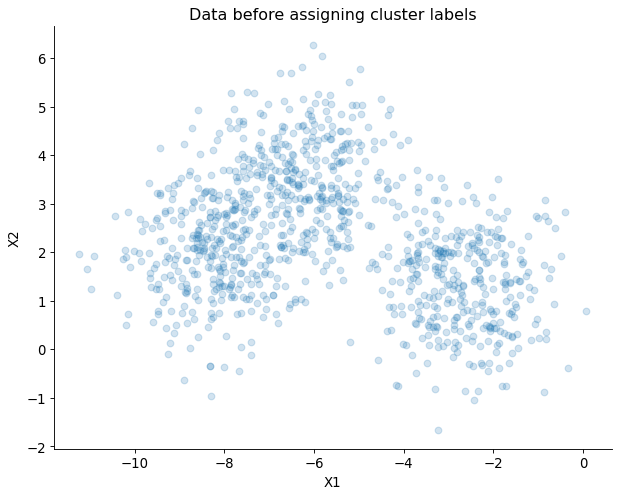

In [555]:
plt.scatter(x="X1",y="X2", data=df, alpha=0.2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data before assigning cluster labels");

In [556]:
K = 3
model = KMeans(n_clusters=K)
model.fit(df)

KMeans(n_clusters=3)

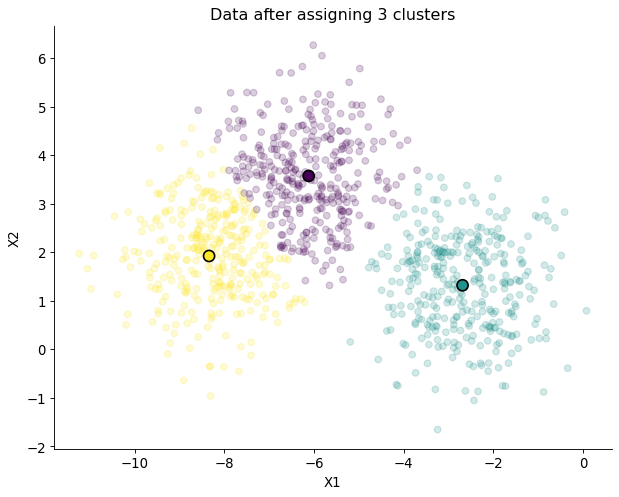

In [557]:
final_centroid = model.cluster_centers_
plt.scatter(x="X1",y="X2", data=df, c=model.labels_, alpha=0.2)
plt.scatter(final_centroid[:,0], final_centroid[:,1], alpha=1,c=range(K), lw=1.5,edgecolors="black", s=100)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"Data after assigning {K} clusters");

In [566]:
df["Clusters"] = model.labels_
df.head()

,X1,X2,Clusters,Manual
0,-1.854899,0.371090,1,2
1,-7.603823,2.318677,2,1
2,-7.633978,0.051958,2,1
3,-8.123828,1.380155,2,1
4,-7.061098,3.175173,0,0


In [567]:
df.tail()

,X1,X2,Clusters,Manual
995,-7.596876,3.147589,2,1
996,-7.753183,1.907865,2,1
997,-7.543099,2.481405,2,1
998,-6.244361,4.615892,0,0
999,-7.412859,0.791095,2,1


### Interpretation and evaluation of results

One of the key disadvantages with K-Means clustering (and clustering in general) is that there is no good way to decide if the model is good? This is do to the fact that there is no _true_ value to compare the results to. 

Futhermore there are some aspects that should be considered when using K-Means clustering algorithm:

1. Results are somewhat depending on random initialization of clusters: it is therefore recommended to repeat the analysis several times to see if results change depending on random initialization. We should then use the __best__ model from this repetitions

2. The best model is the model that has the lowest sum of average within-cluster deviations (i.e. the lowest value for our optimization function) for a constant $K$ (i.e. don't compare optimization results across different $Ks$).

### [Appendix] Comparison Sklearn vs. manual implementation

In [560]:
def calc_centroid(data, clusters, k):
    'Returns the feature means for cluster k based on all features'
    rows = clusters == k 
    subgroup = data[rows]
    if subgroup.shape[0] == 0:
        idx = np.random.randint(len(clusters))
        return data[idx,:]
    return np.mean(subgroup, axis=0) # mean per column

In [561]:
def calc_distance(x1,x2):
    'Calculates squared euclidean distance between array x1 and array x2'
    dist = (sum((x1 - x2)**2))
    if np.isnan(dist) == True: 
        print(x1,x2)
        return
    return dist

In [562]:
def assign_cluster(data,clusters, K):
    'Assigns new cluster based on euclidean distance'
    n = data.shape[0]
    new_clusters = []
    for row in data: # for every xi
        distance = []
        for k in range(K): # for every cluster
            centroid = calc_centroid(data, clusters, k) # calculate centroid
            dist = calc_distance(row,centroid)
            distance.append(dist)
        new_clusters.append(np.argmin(distance))
        
    return np.array(new_clusters)

In [691]:
# Calclates Clusters based on 20 iterations (should be sufficient)
df = pd.read_csv("./data/cluster.csv", usecols=["X1","X2"])
X = df.values
K, n = 3, X.shape[0]
clusters = np.random.choice(range(K),size=n) # randomly assign clusters
for i in range(20):
    new_clusters = assign_cluster(X, clusters, K)
    clusters = new_clusters


In [692]:
df["Manual"] = clusters
df["Sklearn"] = KMeans(n_clusters=K).fit(X).labels_
df.head()

,X1,X2,Manual,Sklearn
0,-1.854899,0.371090,1,1
1,-7.603823,2.318677,2,2
2,-7.633978,0.051958,2,2
3,-8.123828,1.380155,2,2
4,-7.061098,3.175173,0,0


Note that the cluster number is random (arbitrary) and cannot be compared. For example, it could be that both implementations yield the same cluster groups but assign it different numbers (e.g. sklearn gives one cluster a $1$ whereas the manual algorithm assigns the same observations a $2$). 

In [693]:
df.groupby("Sklearn")[["X1","X2"]].mean().mean(axis=1)

Sklearn
0   -1.259156
1   -0.684587
2   -3.197305
dtype: float64

In [694]:
df.groupby("Manual")[["X1","X2"]].mean().mean(axis=1)

Manual
0   -1.256411
1   -0.684587
2   -3.194184
dtype: float64

## Hierarchical clustering

The following section will only briefly illustrate hierarchical clustering / dendrograms but will not cover the algorithm in detail. Please refer to [James et al (2019), Chapter 10, p. 392](http://faculty.marshall.usc.edu/gareth-james/ISL/) for further details. 

One potential difficulty with K-Means clustering is that we don't know the correct number $K$ in advance. This is where _hierarchical clustering_ can be an helpful alternative as it does not require us to specify the number of clusters. 

Hierarchical clustering results in in a tree-based representation of our observations: a __dendrogram__.

Let's have a look at an example from [James et al (2019), Chapter 10, p. 392](http://faculty.marshall.usc.edu/gareth-james/ISL/).

We have a simulated data set with $45$ observations in a two-dimensional space, i.e. with two variables or features.

![clusters](https://www.dropbox.com/s/bkrpjltv8fcf3xr/cluster_for_dendrogram.png?dl=1)

This can be represented by the following dendrogram.

![dendrogram](https://www.dropbox.com/s/lc01ykbvtimvzrm/dendrogram.png?dl=1)

In a dendrogram can be interpreted as follows:

- each leaf (i.e. the very bottom of the dendrogram represents one observation

- observations that are similar to each other fuse into branches

- the higher the branches fuse (on the y-axis) the further away the observations are (i.e. the lower the fusion occurs the more similar are the observations)

This interpretation is very helpful as it enables us to decide for ourselves how many clusters we believe are reasonabel. We can do this by drawing a horizontal line in the chart (see the middle and the right chart). The lower we draw this line, the more clusters we identify (extrem case: horizontal case is at the very bottom meaning each observation makes up one cluster).

For example: in the right chart the horizontal line is drawn at value of $5$ at the y-axis. This yields three clusters representing the three distinct sets of observations beneath the horizontal line. 


Let's look at another toy example to learn how to interpret these charts.

__Example__

In [60]:
# random data
np.random.seed(123)
df = pd.read_csv("./data/cluster.csv", usecols=["X1","X2"])
X = df.values
X = np.random.normal(size=(9,2))

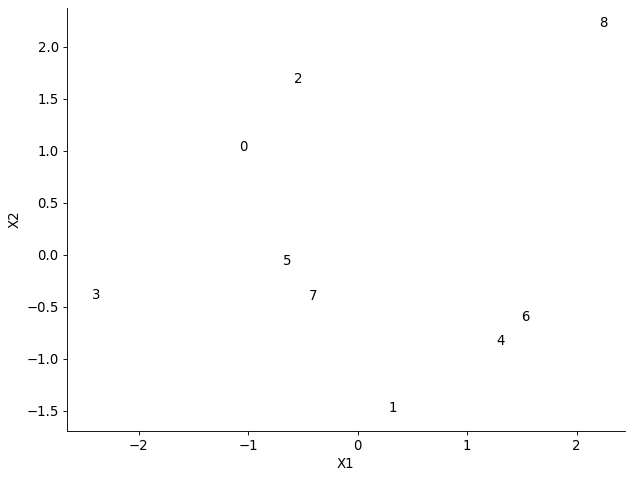

In [61]:
plt.scatter(X[:,0],X[:,1],s=0)
plt.xlabel("X1"), plt.ylabel("X2")
for i, row in enumerate(X):
    plt.annotate(str(i),(row[0],row[1]))

Some observations from plotting the data set (giving each observation a number so we can identify it in the dendrogram):

- observation 4 and 6 are close to each other
- observation 5 and 7 are close to each other
- observation 1 is further away from 4/6 and 5/7
- obsevation 8 is even further away from 4/6 and 5/7

Let's calculate a hierarchical clustering model and plot the corresponding dendrogram to see if these observations can be identified from the dendrogram. 

In [62]:
from sklearn.cluster import AgglomerativeClustering
from utils import plot_dendrogram

In [63]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) 
model.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

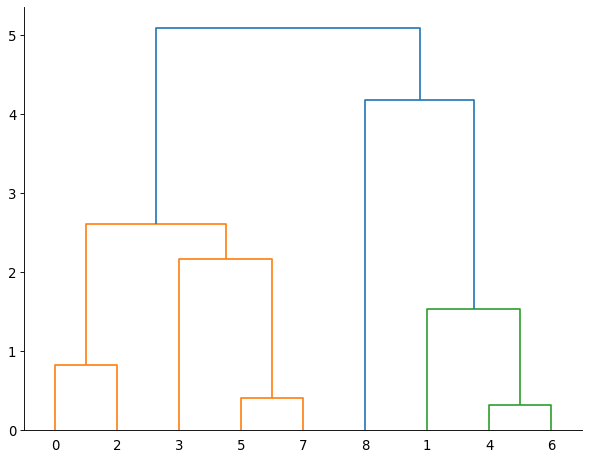

In [64]:
plot_dendrogram(model, truncate_mode='level', p=3)

What can we see from the dendrogram that our observations are confirmed:

- observations 5/7 and 4/6 are fusing at the very bottom of the chart indicating that they are similar to each other
- observations 1 and 5/7 (4/6) are fusing higher up on the vertical axis than 5 and 7 (4 and 6)
- observation 8 and 5/7 (4/6) are fusing even higher up on the vertial axis than 1 and 5/7 (4/6). 

__Advantages of hierarchical clustering__

- we don't need to specify $K$

- we can inspect dendrogram to decide on reasonable number of $K$


__Disadvantage of hierarchical clustering__

- interpretation can be quite difficult / confusing

- choice of $K$ using hierarchical clustering can be arbitrary (where do we cut off?) 

## Considerations for clustering

In both approaches the algorithms _force_ each observation into a cluster. In K-Means even in the number of clusters $K$ we prespecify. This means irrespective of the _true_ grouping of the data (which unfortunately we don't know) we will always end up with each observation in a cluster. However, this may not be reasonable for the data set at hand because we may have - for example - outliers in our data or differences between (similar) observations that are not captured by our data set. 